# Web Scraping: Scraping Phone Retailing Data from Website and Analyze Data

### Set up

In [1]:
!pip install bs4
!pip install html5lib
!pip install lxml
!pip install plotly

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from datetime import date
import datetime

## 1. Scraping and Storing Data from Website
- Phone Retailer: Mobile City  
- Link: mobilecity.vn  
- Final DataFrame: phone_data_recently  
- Columns: ['scraped-date', 'name', 'price']

Flow: 
- Scrape current/older version of webpage. 
- Store HTML data in a temporary .txt file
- Extract data and store it a dataframe. 
- Prepoccessing data by utilizing dataframe
- Store dataframe in a .csv file
- Scrape new data later and add it to the current data file. 

In [4]:
# URL of Retailer

url = "https://mobilecity.vn/dien-thoai"

In [5]:
def formated_date(str_8_digit):
    return datetime.datetime.strptime(str_8_digit, '%Y%m%d').date().strftime("%Y-%m-%d")

### Scraping Website

In [6]:
def scrape_old_version(url, date):
    wayback_url = f"https://web.archive.org/web/{date}/{url}"
    driver = webdriver.Chrome()
    driver.get(wayback_url)

    last_height = 0

    while True:
        driver.execute_script('window.scrollBy(0,1000)')
        time.sleep(5)

        new_height = driver.execute_script('return document.body.scrollHeight')
        driver.execute_script("document.querySelector('.more').click()")
        print(str(new_height)+'-'+str(last_height))

        if (new_height==last_height):
            break
        else: 
            last_height = new_height

    page_source = driver.page_source

    soup = BeautifulSoup(page_source, 'html.parser')
    return soup

In [6]:
def scrape_lastest_version(url):
    driver = webdriver.Chrome()
    driver.get(url)

    last_height = 0

    while True:
        driver.execute_script('window.scrollBy(0,1000)')
        time.sleep(3)

        new_height = driver.execute_script('return document.body.scrollHeight')
        driver.execute_script("document.querySelector('.more').click()")
        print(str(new_height)+'-'+str(last_height))

        if (new_height==last_height):
            break
        else: 
            last_height = new_height

    page_source = driver.page_source

    soup = BeautifulSoup(page_source, 'html.parser')
    return soup

In [7]:
def scapring_format(soup_object, formated_date):
    all_items = soup_object.find_all('div', class_='product-item-left')
    scraped_date = formated_date
    
    list_of_item = []
    for item in all_items:
        product = {}

        product['scraped-date'] = scraped_date
        product['name'] = item.find('p', class_='name').string
        product['price'] = item.find('p', class_='price').string

        list_of_item.append(product)

    df = pd.DataFrame(list_of_item)
    return df

In [76]:
# (Do not need to run) Scraping August data 

# We have August version of this webpage crawled by Wayback Machine on 2024-08-18

aug_date = '20240818'  # YYYYMMDD format
aug_formated_date = formated_date(aug_date)
aug_soup = scrape_old_version(url, aug_date)

monthly_aug24_phonedf = scapring_format(aug_soup, aug_formated_date)

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=129.0.6668.90)
Stacktrace:
	GetHandleVerifier [0x00007FF6F8DAB675+29573]
	(No symbol) [0x00007FF6F8D204A0]
	(No symbol) [0x00007FF6F8BDB6EA]
	(No symbol) [0x00007FF6F8BAFCD5]
	(No symbol) [0x00007FF6F8C5EF67]
	(No symbol) [0x00007FF6F8C77FC1]
	(No symbol) [0x00007FF6F8C570A3]
	(No symbol) [0x00007FF6F8C212DF]
	(No symbol) [0x00007FF6F8C22441]
	GetHandleVerifier [0x00007FF6F90DC5BD+3375821]
	GetHandleVerifier [0x00007FF6F91279B7+3684039]
	GetHandleVerifier [0x00007FF6F911CDDB+3640043]
	GetHandleVerifier [0x00007FF6F8E6B7F6+816390]
	(No symbol) [0x00007FF6F8D2B7AF]
	(No symbol) [0x00007FF6F8D275D4]
	(No symbol) [0x00007FF6F8D27770]
	(No symbol) [0x00007FF6F8D165CF]
	BaseThreadInitThunk [0x00007FFBEB26257D+29]
	RtlUserThreadStart [0x00007FFBED14AF28+40]


In [27]:
# (Do not need to run) Scraping September data 

# We have September version of this webpage crawled by Wayback Machine on 2024-09-13

sep_date = '20240913'  # YYYYMMDD format
sep_formated_date = formated_date(sep_date)
sep_soup = scrape_old_version(url, sep_date)

monthly_sep24_phonedf = scapring_format(sep_soup, sep_formated_date)

3235-0
3378-3235
3378-3378


Only run the code below to get the lastest data

In [8]:
# Scraping today data

today = date.today().strftime("%Y-%m-%d")
lastest_soup = scrape_lastest_version(url)
lastest_data_df = scapring_format(lastest_soup, today)

3061-0
5261-3061
7461-5261
9661-7461
11861-9661
14061-11861
16261-14061
18461-16261
20661-18461
22861-20661
25061-22861
27261-25061
29461-27261
31661-29461
33861-31661
36061-33861
38261-36061
40461-38261
42661-40461
44861-42661
47061-44861
49261-47061
51461-49261
53661-51461
55861-53661
58061-55861
60261-58061
62461-60261
64661-62461
66861-64661
69061-66861
71261-69061
73461-71261
75661-73461
77861-75661
80061-77861
82261-80061
84461-82261
86661-84461
88861-86661
91061-88861
93261-91061
95461-93261
97661-95461
99861-97661
102061-99861
104261-102061
106461-104261
108661-106461
110861-108661
113061-110861
115261-113061
117461-115261
119661-117461
121861-119661
124061-121861
126261-124061
128461-126261
130661-128461
132861-130661
135061-132861
137261-135061
139461-137261
141661-139461
143861-141661
146061-143861
148261-146061
150461-148261
152661-150461
153981-152661
153928-153981
153928-153928


### Extracting More Feature from Name and Drop Unwanted Data

In [9]:
def extract_manufacturer_from_name(df):

    made = []

    for phone in df['name']:
        if 'iPhone' in phone:
            made.append('Apple')
        elif 'Apple Watch' in phone:
            made.append('Apple Watch')
        elif 'Samsung' in phone:
            made.append('Samsung')
        elif 'Xiaomi' in phone:
            made.append('Xiaomi')
        elif 'POCO' in phone:
            made.append('POCO')
        elif 'Realme' in phone:
            made.append('Realme')
        elif 'Asus' in phone:
            made.append('Asus (ROG Phone)')
        elif 'OnePlus' in phone:
            made.append('Oneplus')
        elif 'Vivo' in phone:
            made.append('Vivo')
        elif 'LG' in phone:
            made.append('LG')
        elif 'OPPO' in phone:
            made.append('OPPO')
        elif 'Sony' in phone:
            made.append('Sony')
        elif 'Google' in phone:
            made.append('Google')
        elif 'Vsmart' in phone:
            made.append('Vsmart')
        elif 'Lenovo' in phone:
            made.append('Lenovo - Motorola')
        elif 'Motorola' in phone:
            made.append('Lenovo - Motorola')
        elif 'Tecno' in phone:
            made.append('Tecno')
        elif 'Máy Chơi Game' in phone:
            made.append('Máy Chơi Game PC')
        elif 'Nubia' in phone:
            made.append('Nubia Red Magic')
        elif 'ZTE' in phone:
            made.append('ZTE')
        elif 'Huawei' in phone:
            made.append('Huawei')
        else:
            made.append('Others')

    return made

In [10]:
def extract_used_status_from_name(df):
    used = []

    for phone in df['name']:
        if 'Cũ' in phone:
            used.append(1)
        elif 'cũ' in phone:
            used.append(1)
        else:
            used.append(0)

    return used

In [11]:
def drop_unwanted_data(df):
    # Since we only interested in the phone products, we don't need 'Apple Watch' or 
    # 'May choi game'
    dropped_df = df.drop(df[(df['made']=='Apple Watch')|(df['made']=='Máy Chơi Game PC')].index)

    return dropped_df


In [12]:
# (Do not need to run) Extract feature from past data
past_data = pd.concat([monthly_aug24_phonedf, monthly_sep24_phonedf], ignore_index=True)

made = extract_manufacturer_from_name(past_data)
past_data['made'] = made

used = extract_used_status_from_name(past_data)
past_data['used-status'] = used

data = drop_unwanted_data(past_data)

NameError: name 'monthly_aug24_phonedf' is not defined

In [13]:
# Extract features from lastest data

made = extract_manufacturer_from_name(lastest_data_df)
lastest_data_df['made'] = made

used = extract_used_status_from_name(lastest_data_df)
lastest_data_df['used-status'] = used

lastest_data_df = drop_unwanted_data(lastest_data_df)

### Storing Data into phone_data.csv File

In [97]:
# (Do not need to run)
data.to_csv('phone_data.csv')

In [14]:
lastest_data_df.to_csv('phone_data.csv', mode='a', header=False)

## 2. Data Wragling
- Handle Missing Values
- Correct Data Format
- Data Standardization
- Data Normalization
- Bining and Bins Visulization
- Indicator Variables

### 2.1 Loading Data from CSV File into DataFrame df

In [15]:
df = pd.read_csv('phone_data.csv')
df.reset_index(drop=True, inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798 entries, 0 to 4797
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   scraped-date  4798 non-null   object
 1   name          4798 non-null   object
 2   price         4798 non-null   object
 3   made          4798 non-null   object
 4   used-status   4798 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 187.6+ KB


### 2.2 Handle Missing Values

#### 2.2.1 Handle missing price

In [20]:
df['price'].value_counts().head()

price
4.950.000 ₫    92
3.950.000 ₫    74
6.950.000 ₫    73
2.950.000 ₫    71
8.450.000 ₫    66
Name: count, dtype: int64

We can see that some phone have no price demostrated on the website, instead they have 'Lien He'  
We are going to replace these by numpy.nan value and drop them later on, because filling these missing value with mean value is not reasonable, since phone prices are determined by a variety of features

In [21]:
df['price'] = df['price'].replace('Liên hệ', np.nan)
df.isnull().sum()


scraped-date    0
name            0
price           0
made            0
used-status     0
dtype: int64

In [33]:
df.dropna(axis=0,how='any', inplace=True)
df.isnull().sum()

scraped-date    0
name            0
price           0
made            0
used-status     0
price-binned    0
dtype: int64

In [36]:
df.reset_index(drop=True)


,scraped-date,name,price,made,used-status,price-binned
0,2024-08-18,Xiaomi Redmi 13C Chính hãng (Camera 50MP),2500000,Xiaomi,0,entry-level
1,2024-08-18,Xiaomi POCO C65 (Camera 50MP),2550000,Xiaomi,0,entry-level
2,2024-08-18,OPPO A2x 5G (Dimensity 6020),2650000,OPPO,0,entry-level
3,2024-08-18,Xiaomi Redmi Note 12 5G (Snapdragon 4 Gen 1),2750000,Xiaomi,0,entry-level
4,2024-08-18,Xiaomi Redmi Note 11 5G (Dimensity 810),2950000,Xiaomi,0,entry-level
...,...,...,...,...,...,...
3495,2024-10-13,Smartisan Nut Pro 3 (Tiktok Phone),8950000,Others,0,entry-level
3496,2024-10-13,OnePlus 7,9450000,Oneplus,0,entry-level
3497,2024-10-13,Huawei Nova 5 Pro,9950000,Huawei,0,entry-level
3498,2024-10-13,Xiaomi Mi 10 Pro,15950000,Xiaomi,0,mid


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 0 to 4763
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   scraped-date  3500 non-null   datetime64[ns]
 1   name          3500 non-null   object        
 2   price         3500 non-null   int32         
 3   made          3500 non-null   object        
 4   used-status   3500 non-null   int64         
 5   price-binned  3500 non-null   category      
dtypes: category(1), datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 154.0+ KB


### 2.3 Correct Data Format

In [24]:
df['scraped-date'] = pd.to_datetime(df["scraped-date"])

In [25]:
df['price'].head()

0    2.500.000 ₫
1    2.550.000 ₫
2    2.650.000 ₫
3    2.750.000 ₫
4    2.950.000 ₫
Name: price, dtype: object

There are 2 problems with the 'price' column now in the DataFrame:
- It contains the currency symbol
- Number seperated by dot (Which makes it impossible to convert into int type)

In [26]:
# Remove the currency symbol
df["price"] = df['price'].str.replace('₫',"", regex=True)

# Remove the dot
df["price"] = df['price'].str.replace('.',"")

# Convert into int type
df["price"] = df['price'].astype('int')

df.head()

,scraped-date,name,price,made,used-status
0,2024-08-18,Xiaomi Redmi 13C Chính hãng (Camera 50MP),2500000,Xiaomi,0
1,2024-08-18,Xiaomi POCO C65 (Camera 50MP),2550000,Xiaomi,0
2,2024-08-18,OPPO A2x 5G (Dimensity 6020),2650000,OPPO,0
3,2024-08-18,Xiaomi Redmi Note 12 5G (Snapdragon 4 Gen 1),2750000,Xiaomi,0
4,2024-08-18,Xiaomi Redmi Note 11 5G (Dimensity 810),2950000,Xiaomi,0


### 2.4 Data Binning 

#### 2.4.1 Bining Price 

In [27]:
price_bins = np.linspace(min(df["price"]), max(df["price"]), 5)
calo_bins = np.array([0., 6000000., 10000000., 18000000., max(df['price'])])
price_group = ['entry-level', 'mid', 'upper-mid', 'flagship']
df['price-binned'] = pd.cut(df['price'], price_bins, labels=price_group, include_lowest=True )
df[['price','price-binned']].head()

,price,price-binned
0,2500000,entry-level
1,2550000,entry-level
2,2650000,entry-level
3,2750000,entry-level
4,2950000,entry-level


In [28]:
df['price-binned'].value_counts()

price-binned
entry-level    2717
mid             595
upper-mid       156
flagship         32
Name: count, dtype: int64

Text(0.5, 1.0, 'price segment')

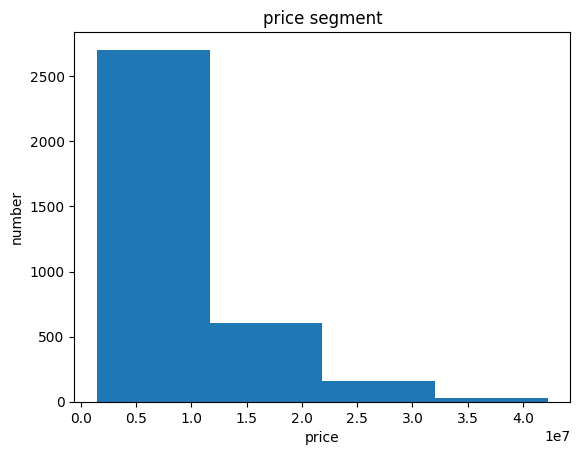

In [29]:
%matplotlib inline

# draw historgram of attribute "price" with bins = 4
plt.hist(df["price"], bins = 4)

# set x/y labels and plot title
plt.xlabel("price")
plt.ylabel("number")
plt.title("price segment")

# 3. Data Analysis

In [30]:
# Average price based on each phone segment

df_test = df[['price', 'price-binned']]
df_grp = df_test.groupby(['price-binned'], as_index=False).mean().round(0)

df_grp['price'] = df_grp['price'].astype(int).astype(str) + ' ₫'

df_grp.head()

C:\Users\aDMIN\AppData\Local\Temp\ipykernel_23496\3269461129.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grp = df_test.groupby(['price-binned'], as_index=False).mean().round(0)


,price-binned,price
0,entry-level,5857672 ₫
1,mid,15423674 ₫
2,upper-mid,25904103 ₫
3,flagship,37066125 ₫
